# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [ ]:

df = pd.read_csv("/Users/westonpangle/Documents/MDST/MDST Tutorial/MDST-Tutorial-Redesign-Main/data/states_edu.csv")

df.head()

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [ ]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_K_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_ALL_G':'ENROLL_ALL_G',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_SECONDARY',
    'ENROLL':'ENROLL_ALL'
    },
    axis=1, inplace=True)

df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
df.head()

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 8 Math

How many years of data are logged in our dataset? 

In [ ]:

print(df["YEAR"].unique())

# 13 years of data


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [ ]:

df.groupby("STATE")["AVG_MATH_8_SCORE"].mean().loc[['MICHIGAN', 'OHIO']].plot()

# Ohio has the higher average


Find the average for your outcome score across all states in 2019

In [ ]:
t19 = df.groupby("YEAR")
t19.count()

# The average math 8 score in 2019 is 53

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [ ]:
temp = df.groupby("STATE")["AVG_MATH_8_SCORE"].mean()
temp

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [ ]:

df['ENROLL_ALL']

In [ ]:

df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL_G']
df['SUPPORT_SERVICES_EXPENDITURE_PER_8'] = df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] / df['ENROLL_8']
df['EXPENDITURE_TOWARDS_INSTRUCTION'] = df["INSTRUCTION_EXPENDITURE"] / df["TOTAL_EXPENDITURE"]
df



Feature engineering justification: I created a column for student service expenditure per student in 8 because I am mainly looking at the average math scores for students enrolled in 8. I also created total expenditure per instruction expenditure because I want to see if states with higher instruction expenditure will have higher average scores in math 8.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

In [ ]:
df.plot.scatter(x='AVG_MATH_8_SCORE', y='SUPPORT_SERVICES_EXPENDITURE_PER_8', alpha=0.6)

Students enrolled in 8 generally don't receive much expenditure. However, students who have more expenditure generall have higher average math 8 scores.

**Visualization 2**

In [ ]:
df.plot.scatter(x='AVG_MATH_8_SCORE', y='EXPENDITURE_TOWARDS_INSTRUCTION', alpha=0.6)

Generally, when more than 45% of of expenditure is put towards instruction, the average math 8 score increases. However, going beyond about 56% doesn't really effect math 8 scores.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [146]:
from sklearn.model_selection import train_test_split

In [181]:
X = df[['ENROLL_8', 'EXPENDITURE_TOWARDS_INSTRUCTION']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']
y.fillna(y.mean(), inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

print(y_train)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [183]:
# import your sklearn class here

from sklearn.linear_model import LinearRegression

In [184]:
# create your model here
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

In [186]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [ ]:
print(model.intercept_)
print(model.coef_)

print(np.mean(model.predict(X_test)-y_test))
print(np.mean(abs(model.predict(X_test)-y_test)))
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

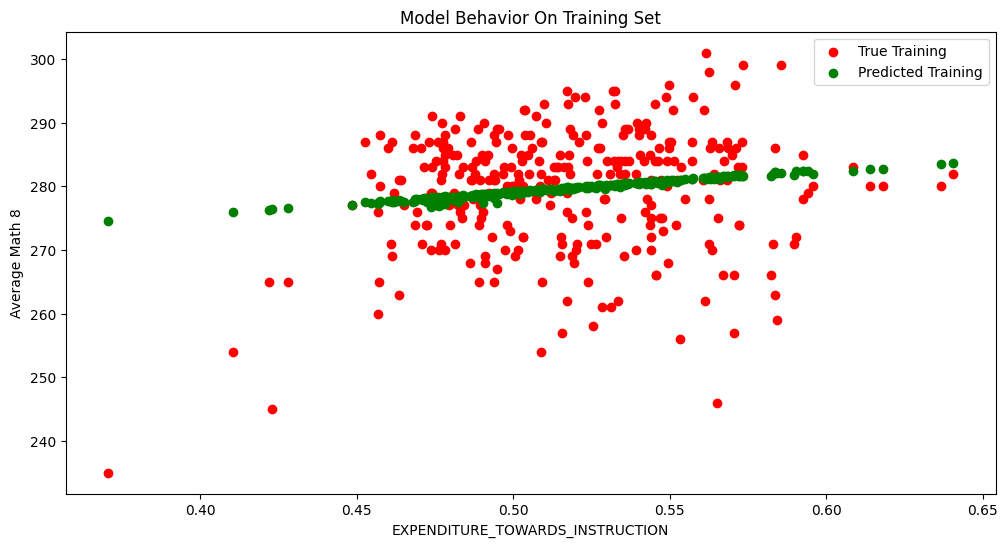

In [191]:
col_name = 'EXPENDITURE_TOWARDS_INSTRUCTION'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average Math 8')
plt.title("Model Behavior On Training Set")

In [ ]:
col_name = 'ENROLL_8'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Average Math 8')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

I believe my findings were very mixed and possibly incorrect in some ways. Looking at the data, I wasn't sure if I was looking at the correct thing. This would definitely be due to my newness to using and displaying data using NumPy. This will of course change with more experience. In my findings, I did find that more expenditure towards instruction didn't necessarily lead to a large change in math grade 8 scores. Using my model, there was definitely an increasing slope across the prediction, however it was very minimal. It did kind of fit the motion of the "true training" in the sense it showed very slight increase with more expenditure, but the true training data was a lot more scattered. With this in mind, it makes my modeling ineffective, since it differs greatly from the scatterplot of the true data. However, since the scatterplot is so scattered compared to the predicted training, it successfully shows the comparison between expenditure towards instruction and math 8 scores don't have enough significant impact on each other to make them predicatable.